# Class work Lab 02: Nonlinear Regression and Overfitting

### Name: Pranisaa Charnparttaravanit
### ID: st121720

In [1]:
# Hypothesis function

def h(X, theta):
    return X.dot(theta)

# Solve the normal equations

def regress(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta

# RMSE (root mean squared error) metric for prediction accuracy

def rmse(y, y_pred):
    return np.sqrt(np.dot((y - y_pred).T, y - y_pred) / m)


In [2]:
# Plot X, y, and the two regression models
def get_predictions(x, theta):
    x = np.array([x]).T
    x = np.insert(x, 0, 1, axis=1)
    while(x.shape[1] < theta.shape[0]):
        x = np.insert(x, x.shape[1], x[:,1] * x[:,-1], axis=1)
    y = h(x, theta)
    return y

In [3]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

### Import data

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import random

data = np.genfromtxt('MonthlySales_data.csv',delimiter = ',', dtype=str);

# Extract headers

headers = data[0,:];
# print("Headers:", headers)

# Extract raw data

data = np.array(data[1:,:], dtype=float);

# Extract y column from raw data

y_index = np.where(headers == 'sale amount')[0][0];
y = data[:,y_index];
#print(y.shape)
# Extract x column (just the month) from raw data

x_index1 = np.where(headers == 'month')[0][0];
x_index2 = np.where(headers == 'year')[0][0];

#month
X1 = data[:,x_index1];
m1 = X1.size
n1 = 1
X1 = X1.reshape(m1, n1)
# print(X1.shape)

#year
X2 = data[:,x_index2];
m2 = X2.size
n2 = 1
X2 = X2.reshape(m2, n2)
# print(X2.shape)

X_12 = np.concatenate((X1,X2), axis = 1)
# print(X_12.shape)
# print(X)

print('Extracted %d yearly sales records' % m1)
print('Extracted %d monthly sales records' % m2)

Extracted 240 yearly sales records
Extracted 240 monthly sales records


### Normalize x values and y values

In [162]:
#Normalize x values
x_mean=np.mean(X_12, axis = 0)
x_sd=np.std(X_12, axis = 0)
X = (X_12-x_mean)/x_sd
# print(X[:5,:])

#Normalize y values
y_mean = np.mean(y,axis =0)
y_std = np.std(y,axis = 0)
y_norm = (y-y_mean)/y_std
# print(y_norm[:5])
# print(y_norm.shape)

### Plot of sales amount VS x-variables(months and years)

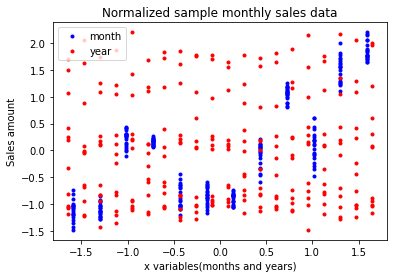

In [166]:
plt.plot(X[:,0], y_norm, 'b.',label = 'month')
plt.plot(X[:,1], y_norm, 'r.',label = 'year')
plt.xlabel('x variables(months and years)')
plt.ylabel('Sales amount')
plt.title('Normalized sample monthly sales data')
plt.legend()
plt.show()

### Partion data into training and test datasets

In [161]:
idx = np.arange(0,m1)
random.shuffle(idx)    #must shuffle! because we dont know how data are arranged. Maybe in particular order, therefore we must shuffle them before splitting them into training set and testing set
#uniform sampling without repeating, MIDTERM EXAM 

percent_train = .6
m_train = int(m1 * percent_train)
#print(m_train)
train_idx = idx[0:m_train]
#print(train_idx)
test_idx = idx[m_train:m1+1]
X_train = X[train_idx,0:y_index];
X_test = X[test_idx,0:y_index];

y_train = y_norm[train_idx];
y_test = y_norm[test_idx];

### Linear regression of monthly sale subject to months

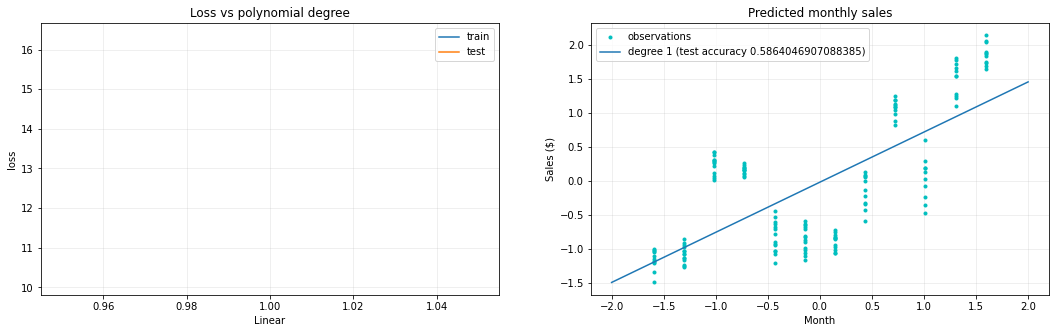

r squared of linear regression is 0.5586241305106852


In [150]:
# Cost function normalized by number of examples

def J(theta,X,y):
    return 1 / 2 / X.shape[1] * (h(X,theta)-y).T.dot(h(X,theta)-y)

# Get design matrix for polynomial model of degree d

def x_polynomial(x, d):
    a = np.ones((x.shape[0], 1))    #first psition of shape -> no. row
    for i in range(d):
        a = np.concatenate((a,x**(i+1)), axis = 1)
    return a

# Build models of degree 1 to max_degree

max_degree = 1

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss

fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train[:,0], y_train, 'c.', label='observations')
X_lintrain = X_train[:,0].reshape(-1,1)
X_lintest = X_test[:,0].reshape(-1,1)
theta_lin=[]
for i in range(1, max_degree+1):

    # Fit model on training data and get cost for training and test data
    
    Xi_train = x_polynomial(X_lintrain, i)    
    Xi_test = x_polynomial(X_lintest, i);

    theta = regress(Xi_train, y_train)
    theta_lin.append(theta)
    J_train[i-1] = J(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = J(theta, Xi_test, y_test)
    
    # Plot

    x_series = np.linspace(-2, 2, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('Linear')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

y_pred1 = theta_lin[0][0] + theta_lin[0][1]*X[:,0]
r_squared(y_norm,y_pred1)

print('r squared of linear regression is', r_squared(y_norm,y_pred1))


## Questions

#### Q1. See if normalizing X improves the numerical stability for large d.

Ans:
Yes. By normalizing X, the numerical stability increases up til the degree of 12

#### Q2. Add the `year` variable from the monthly sales dataset to your simple linear regression model and quantify whether including it improves test set performance. Show the observations and predictions in a 3D surface plot.

Ans: 
Yes, by adding year variable from the monthly sales dataset does not have a significant effect on the performance of the test set in the linear regression model.
The r-squared values of both are similar. (0.55862 for linear regression model with only month variable and r square as 0.5577 linear regression with month and year variables)

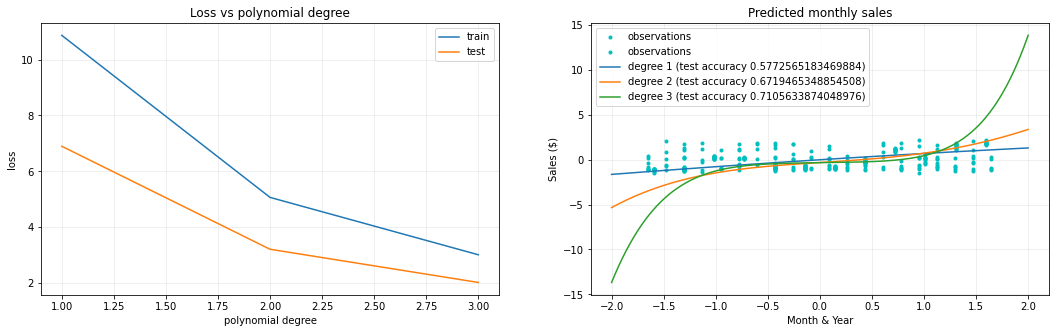

In [152]:
# Cost function normalized by number of examples

def J(theta,X,y):
    return 1 / 2 / X.shape[1] * (h(X,theta)-y).T.dot(h(X,theta)-y)

# Get design matrix for polynomial model of degree d

def x_polynomial(x, d):
    a = np.ones((x.shape[0], 1))    #first psition of shape -> no. row
    for i in range(d):
        a = np.concatenate((a,x**(i+1)), axis = 1)
    return a

# Build models of degree 1 to max_degree

max_degree = 3

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss

fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

theta_all=[]

for i in range(1, max_degree+1):

    # Fit model on training data and get cost for training and test data
    
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);

    theta = regress(Xi_train, y_train)
    theta_all.append(theta)
    J_train[i-1] = J(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = J(theta, Xi_test, y_test)
    
    # Plot

    x_series = np.linspace(-2, 2, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month & Year')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

## Linear

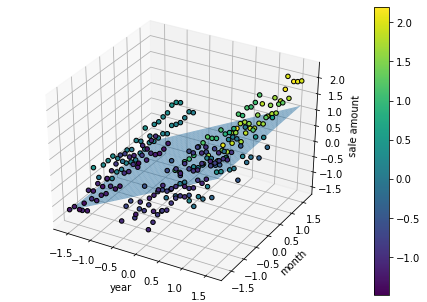

r squared of linear regression is 0.5591963554808369


In [124]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,0],X[:,1],y_norm,edgecolors='black',c=y_norm,alpha=1)
# p = ax.scatter(X[:,0],X[:,1],y,edgecolors='black',c=y,alpha=1)
ax.set_xlabel('year')
ax.set_ylabel('month')
ax.set_zlabel('sale amount')

X11 = np.linspace(min(X[:,0]), max(X[:,0]), len(y))
X22 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))

xx1,xx2 = np.meshgrid(X11,X22)

yy = (theta_all[0][0] + theta_all[0][1]*xx1 + theta_all[0][2]*xx2)
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=35, azim=-60)
plt.colorbar(p)
plt.show()

# y_pred1 = theta_all[0][0] + theta_all[0][1]*X[:,0] + theta_all[0][2]*X[:,1]
# r_squared(y_norm,y_pred1)

# print('r squared of linear regression is', r_squared(y_norm,y_pred1))

### Q3. Develop polynomial regression models of degree 2 and 3 based on the two input variables. Show results as 3D surface plots and discuss whether you observe overfitting or not.

Ans:
After plotting observing the results for polynomial regression models of both the degrees 2 and 3, it is seen that the r squares still improve while increasing the polynomial degress without the sign of overfitting.

## Degree 2

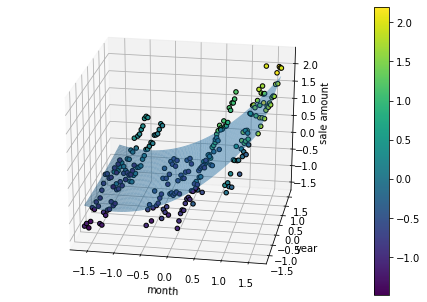

r squared of linear regression is 0.6566292342309663


In [126]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,0],X[:,1],y_norm,edgecolors='black',c=y_norm,alpha=1)
ax.set_xlabel('month')
ax.set_ylabel('year')
ax.set_zlabel('sale amount')

X1 = np.linspace(min(X[:,0]), max(X[:,0]), len(y))
X2 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)
# print(theta_all[1])
yy = (theta_all[1][0] + theta_all[1][1]*xx1 + theta_all[1][2]*xx2 + theta_all[1][3]*(xx1**2) +theta_all[1][4]*(xx2**2))
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=-80)
plt.colorbar(p)
plt.show()

y_pred2 = (theta_all[1][0] + theta_all[1][1]*X[:,0] + theta_all[1][2]*X[:,1] + theta_all[1][3]*(X[:,0]**2) +theta_all[1][4]*(X[:,1]**2))
r_squared(y_norm,y_pred2)
print('r squared of linear regression is', r_squared(y_norm,y_pred2))

## Degree 3

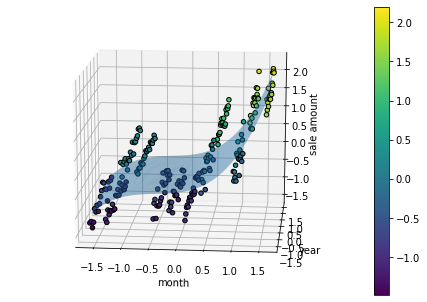

r squared of linear regression is 0.7078851513424367


In [125]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,0],X[:,1],y_norm,edgecolors='black',c=y_norm,alpha=1)
ax.set_xlabel('month')
ax.set_ylabel('year')
ax.set_zlabel('sale amount')

X1 = np.linspace(min(X[:,0]), max(X[:,0]), len(y))
X2 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)
yy = (theta_all[2][0] + theta_all[2][1]*xx1 + theta_all[2][2]*xx2 + theta_all[2][3]*(xx1**2) +theta_all[2][4]*(xx2**2)+theta_all[2][5]*(xx1**3)+theta_all[2][6]*(xx2**3))

ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=15, azim=-85)
plt.colorbar(p)
plt.show()

y_pred3 = (theta_all[2][0] + theta_all[2][1]*X[:,0] + theta_all[2][2]*X[:,1] + theta_all[2][3]*(X[:,0]**2) +theta_all[2][4]*(X[:,1]**2)+theta_all[2][5]*(X[:,0]**3)+theta_all[2][6]*(X[:,1]**3))
r_squared(y_norm,y_pred3)
print('r squared of linear regression is', r_squared(y_norm,y_pred3))